In [1]:
import seaborn as sns

In [6]:
!pip install CityLearn

  Using cached CityLearn-2.3.0-py3-none-any.whl (379 kB)
  Using cached doe_xstock-1.1.0-py3-none-any.whl (20 kB)
  Using cached torchvision-0.21.0-cp310-cp310-win_amd64.whl (1.6 MB)
     ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
     --------------------------------------- 0.0/15.8 MB 220.2 kB/s eta 0:01:12
     --------------------------------------- 0.1/15.8 MB 328.2 kB/s eta 0:00:48
      --------------------------------------- 0.3/15.8 MB 1.2 MB/s eta 0:00:14
     - -------------------------------------- 0.6/15.8 MB 2.0 MB/s eta 0:00:08
     -- ------------------------------------- 1.0/15.8 MB 3.0 MB/s eta 0:00:05
     --- ------------------------------------ 1.5/15.8 MB 3.9 MB/s eta 0:00:04
     ---- ----------------------------------- 1.9/15.8 MB 4.1 MB/s eta 0:00:04
     ------ --------------------------------- 


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# User interaction
from IPython.display import clear_output
from ipywidgets import Button, FloatSlider, HBox, HTML
from ipywidgets import IntProgress, Text, VBox

# Data manipulation
from bs4 import BeautifulSoup
import math
import numpy as np
import pandas as pd
import random
import re
import requests
import simplejson as json

# CityLearn

from citylearn.agents.rbc import HourRBC
from citylearn.agents.q_learning import TabularQLearning
from citylearn.citylearn import CityLearnEnv
from citylearn.data import DataSet
from citylearn.reward_function import RewardFunction
from citylearn.wrappers import NormalizedObservationWrapper
from citylearn.wrappers import StableBaselines3Wrapper
from citylearn.wrappers import TabularQLearningWrapper

# baseline RL algorithms
from stable_baselines3 import SAC
from stable_baselines3.common.callbacks import BaseCallback

In [8]:
# System operations
import inspect
import os
import uuid

# Date and time
from datetime import datetime

# type hinting
from typing import List, Mapping, Tuple

# Data visualization
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [10]:
import citylearn

In [11]:
citylearn.__version__

'2.1.2'

In [12]:
print('All CityLearn datasets:', sorted(DataSet.get_names()))

All CityLearn datasets: ['baeda_3dem', 'citylearn_challenge_2020_climate_zone_1', 'citylearn_challenge_2020_climate_zone_2', 'citylearn_challenge_2020_climate_zone_3', 'citylearn_challenge_2020_climate_zone_4', 'citylearn_challenge_2021', 'citylearn_challenge_2022_phase_1', 'citylearn_challenge_2022_phase_2', 'citylearn_challenge_2022_phase_3', 'citylearn_challenge_2022_phase_all', 'citylearn_challenge_2023_phase_1', 'citylearn_challenge_2023_phase_2_local_evaluation', 'citylearn_challenge_2023_phase_2_online_evaluation_1', 'citylearn_challenge_2023_phase_2_online_evaluation_2', 'citylearn_challenge_2023_phase_2_online_evaluation_3', 'citylearn_challenge_2023_phase_3_1', 'citylearn_challenge_2023_phase_3_2', 'citylearn_challenge_2023_phase_3_3']


In [13]:
DATASET_NAME = 'citylearn_challenge_2023_phase_3_2'
schema = DataSet.get_schema(DATASET_NAME)

In [14]:
root_directory = schema['root_directory']

# change the suffix number in the next code line to a
# number between 1 and 3 to preview other buildings in phase 1; 1-6 in phase 3_1
building_name = 'Building_6'

filename = schema['buildings'][building_name]['energy_simulation']
filepath = os.path.join(root_directory, filename)
building_data = pd.read_csv(filepath)
display(building_data.head())

C:\Users\Lenovo IP510s\Desktop\Master\seaborn_env\lib\site-packages\IPython\core\formatters.py:406: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
C:\Users\Lenovo IP510s\Desktop\Master\seaborn_env\lib\site-packages\IPython\core\formatters.py:406: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


Month  Hour  Day Type  Daylight Savings Status  Indoor Temperature (C)   
0      6     1         2                        0               23.380363  \
1      6     2         2                        0               23.334660   
2      6     3         2                        0               23.333405   
3      6     4         2                        0               23.333344   
4      6     5         2                        0               23.333342   

   Average Unmet Cooling Setpoint Difference (C)   
0                                       0.047030  \
1                                       0.001327   
2                                       0.000071   
3                                       0.000010   
4                                       0.000009   

   Indoor Relative Humidity (%)  Equipment Electric Power (kWh)   
0                     67.866299                        0.333815  \
1                     67.343615                        0.332391   
2                     66.921912                        0.330967   
3                     66.442666                        0.335078   
4                     66.088250                        0.338997   

   DHW Heating (kWh)  Cooling Load (kWh)  Heating Load (kWh)   
0                0.0            1.750008                 0.0  \
1                0.0            2.617700                 0.0   
2                0.0            2.182582                 0.0   
3                0.0            1.615071                 0.0   
4                0.0            1.135308                 0.0   

   Solar Generation (W/kW)  Occupant Count (people)   
0                      0.0                      2.0  \
1                      0.0                      2.0   
2                      0.0                      2.0   
3                      0.0                      2.0   
4                      0.0                      2.0   

   Temperature Set Point (C)  HVAC Mode (Off/Cooling/Heating)  
0                  23.333333                                1  
1                  23.333333                                1  
2                  23.333333                                1  
3                  23.333333                                1  
4                  23.333333                                1

In [15]:
display(building_data.describe(include='all'))

C:\Users\Lenovo IP510s\Desktop\Master\seaborn_env\lib\site-packages\IPython\core\formatters.py:406: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


Month         Hour     Day Type  Daylight Savings Status   
count  2208.000000  2208.000000  2208.000000                   2208.0  \
mean      7.010870    12.500000     3.978261                      0.0   
std       0.814387     6.923755     2.000335                      0.0   
min       6.000000     1.000000     1.000000                      0.0   
25%       6.000000     6.750000     2.000000                      0.0   
50%       7.000000    12.500000     4.000000                      0.0   
75%       8.000000    18.250000     6.000000                      0.0   
max       8.000000    24.000000     7.000000                      0.0   

       Indoor Temperature (C)  Average Unmet Cooling Setpoint Difference (C)   
count             2208.000000                                    2208.000000  \
mean                24.500710                                      -0.038164   
std                  1.180635                                       0.283904   
min                 22.777718                                      -3.641964   
25%                 23.333525                                      -0.000429   
50%                 24.444397                                       0.000004   
75%                 25.281430                                       0.000039   
max                 27.222615                                       0.118916   

       Indoor Relative Humidity (%)  Equipment Electric Power (kWh)   
count                   2208.000000                     2208.000000  \
mean                      57.259895                        0.660362   
std                        5.133391                        0.610833   
min                       43.379739                        0.310066   
25%                       54.138977                        0.353402   
50%                       56.884485                        0.550186   
75%                       60.091115                        0.783774   
max                       81.648766                        5.852501   

       DHW Heating (kWh)  Cooling Load (kWh)  Heating Load (kWh)   
count        2208.000000         2208.000000              2208.0  \
mean            0.141762            3.045808                 0.0   
std             0.363977            1.544817                 0.0   
min             0.000000            0.000000                 0.0   
25%             0.000000            1.988826                 0.0   
50%             0.000000            2.925686                 0.0   
75%             0.187059            4.049930                 0.0   
max             4.889257            8.957230                 0.0   

       Solar Generation (W/kW)  Occupant Count (people)   
count              2208.000000              2208.000000  \
mean                181.965621                 1.591938   
std                 228.982415                 0.566924   
min                   0.000000                 0.000000   
25%                   0.000000                 1.000000   
50%                  27.846772                 2.000000   
75%                 388.286173                 2.000000   
max                 712.919243                 2.000000   

       Temperature Set Point (C)  HVAC Mode (Off/Cooling/Heating)  
count                2208.000000                           2208.0  
mean                   24.538874                              1.0  
std                     1.235644                              0.0  
min                    22.777778                              1.0  
25%                    23.333333                              1.0  
50%                    24.444444                              1.0  
75%                    25.333333                              1.0  
max                    27.222222                              1.0

In [21]:
import numpy as np
import time
import os
import json
import pandas as pd
from citylearn.citylearn import CityLearnEnv

In [16]:
data_dir = './'
SCHEMA = os.path.join(data_dir, 'schema.json')

env = CityLearnEnv(SCHEMA)

In [17]:
env.observation_names[0][:]

['day_type',
 'hour',
 'outdoor_dry_bulb_temperature',
 'outdoor_dry_bulb_temperature_predicted_6h',
 'outdoor_dry_bulb_temperature_predicted_12h',
 'outdoor_dry_bulb_temperature_predicted_24h',
 'diffuse_solar_irradiance',
 'diffuse_solar_irradiance_predicted_6h',
 'diffuse_solar_irradiance_predicted_12h',
 'diffuse_solar_irradiance_predicted_24h',
 'direct_solar_irradiance',
 'direct_solar_irradiance_predicted_6h',
 'direct_solar_irradiance_predicted_12h',
 'direct_solar_irradiance_predicted_24h',
 'carbon_intensity',
 'indoor_dry_bulb_temperature',
 'non_shiftable_load',
 'solar_generation',
 'dhw_storage_soc',
 'electrical_storage_soc',
 'net_electricity_consumption',
 'electricity_pricing',
 'electricity_pricing_predicted_6h',
 'electricity_pricing_predicted_12h',
 'electricity_pricing_predicted_24h',
 'cooling_demand',
 'dhw_demand',
 'occupant_count',
 'indoor_dry_bulb_temperature_set_point',
 'power_outage',
 'indoor_dry_bulb_temperature',
 'non_shiftable_load',
 'solar_generat

In [18]:
env.reset()
env.buildings[0].energy_simulation.non_shiftable_load[:4]

print(env.buildings[0].energy_simulation.solar_generation[env.time_step+10])
print(env.buildings[1].energy_simulation.solar_generation[env.time_step+10])
# print(env.buildings[2].energy_simulation.carbon_intnsity.carbon[env.time_step+10])
env.buildings[0].solar_generation #   solar_generation#[env.time_step+10]

564.91034
564.91034


array([-0.], dtype=float32)

In [19]:
observations = env.reset()
for i in range(1):
    actions = np.zeros( (1, len(env.buildings) * 3) )
    print("\n ====== BUILDING OBSERVATION ========= \n ", env.buildings[0].observations())
    print("\n ========= ENVIRONMENT OBSERVATION ========= \n ", observations)
    observations, _, done, _ = env.step(actions)


 ====== BUILDING OBSERVATION ========= 
  {'day_type': np.int64(5), 'hour': np.int64(1), 'outdoor_dry_bulb_temperature': np.float32(24.66), 'outdoor_dry_bulb_temperature_predicted_6h': np.float32(24.910639), 'outdoor_dry_bulb_temperature_predicted_12h': np.float32(38.41596), 'outdoor_dry_bulb_temperature_predicted_24h': np.float32(27.611464), 'diffuse_solar_irradiance': np.float32(0.0), 'diffuse_solar_irradiance_predicted_6h': np.float32(54.625927), 'diffuse_solar_irradiance_predicted_12h': np.float32(116.84289), 'diffuse_solar_irradiance_predicted_24h': np.float32(0.0), 'direct_solar_irradiance': np.float32(0.0), 'direct_solar_irradiance_predicted_6h': np.float32(143.32434), 'direct_solar_irradiance_predicted_12h': np.float32(1020.7561), 'direct_solar_irradiance_predicted_24h': np.float32(0.0), 'carbon_intensity': np.float32(0.40248835), 'indoor_dry_bulb_temperature': np.float32(23.098652), 'non_shiftable_load': np.float32(0.35683933), 'solar_generation': np.float32(0.0), 'dhw_storag

In [42]:
observations = env.reset()
# create an empty dataframe with column names
print(env.time_step)

# check the decision variable by indexing the building variable at the time step
print(env.buildings[0].energy_simulation.dhw_demand[env.time_step])
print(env.buildings[0].energy_simulation.dhw_demand[env.time_step])
print(env.buildings[0].heating_device)
print(env.buildings[0].observations().keys())

0
0.055682074
0.055682074
dict_keys(['day_type', 'hour', 'outdoor_dry_bulb_temperature', 'outdoor_dry_bulb_temperature_predicted_6h', 'outdoor_dry_bulb_temperature_predicted_12h', 'outdoor_dry_bulb_temperature_predicted_24h', 'diffuse_solar_irradiance', 'diffuse_solar_irradiance_predicted_6h', 'diffuse_solar_irradiance_predicted_12h', 'diffuse_solar_irradiance_predicted_24h', 'direct_solar_irradiance', 'direct_solar_irradiance_predicted_6h', 'direct_solar_irradiance_predicted_12h', 'direct_solar_irradiance_predicted_24h', 'carbon_intensity', 'indoor_dry_bulb_temperature', 'non_shiftable_load', 'solar_generation', 'dhw_storage_soc', 'electrical_storage_soc', 'net_electricity_consumption', 'electricity_pricing', 'electricity_pricing_predicted_6h', 'electricity_pricing_predicted_12h', 'electricity_pricing_predicted_24h', 'cooling_demand', 'dhw_demand', 'occupant_count', 'indoor_dry_bulb_temperature_set_point', 'power_outage'])


In [23]:
cols = ['day_type', 'hour', 'outdoor_dry_bulb_temperature', 'outdoor_dry_bulb_temperature_predicted_6h', 
        'outdoor_dry_bulb_temperature_predicted_12h', 'outdoor_dry_bulb_temperature_predicted_24h', 
        'diffuse_solar_irradiance', 'diffuse_solar_irradiance_predicted_6h', 'diffuse_solar_irradiance_predicted_12h', 
        'diffuse_solar_irradiance_predicted_24h', 'direct_solar_irradiance', 'direct_solar_irradiance_predicted_6h', 
        'direct_solar_irradiance_predicted_12h', 'direct_solar_irradiance_predicted_24h', 'carbon_intensity', 
        'indoor_dry_bulb_temperature', 'non_shiftable_load', 'solar_generation', 'dhw_storage_soc', 
        'electrical_storage_soc', 'net_electricity_consumption', 'electricity_pricing', 'electricity_pricing_predicted_6h',
        'electricity_pricing_predicted_12h', 'electricity_pricing_predicted_24h', 'cooling_demand', 'dhw_demand',
        'occupant_count', 'indoor_dry_bulb_temperature_set_point', 'power_outage']

drop = ['day_type', 'hour', 'outdoor_dry_bulb_temperature', 
        'diffuse_solar_irradiance', 'direct_solar_irradiance', 'non_shiftable_load', 'solar_generation', 'dhw_storage_soc', 
        'electrical_storage_soc', 'net_electricity_consumption', 'electricity_pricing', 'cooling_demand', 'dhw_demand',
        'occupant_count', 'indoor_dry_bulb_temperature_set_point']

def building_observation_dataframe(environment, building: int , forward_steps: int = 48, drop_cols: list = [], keep_cols = []):
    """ takes a CityLearn Environment and a given building and builds a dataframe for future 48hrs 
    ======================
    environement: defined CityLearn environment
    building: building number to build dataframe for
    forward step: number of steps to predict for target variable
    drop_cols: columns to drop 
    
    returns a dataframe for a given time instance with future variables """

    generated_df = pd.DataFrame(columns=env.buildings[building].observations().keys())
    generated_df = generated_df._append(pd.Series(environment.buildings[building].observations().values(), index=generated_df.columns), ignore_index=True)
    # generate same repeated rows
    # matrix = [environment.buildings[building].observations().values()]
    # for i in range(1,forward_steps):
    #     matrix.append(environment.buildings[building].observations().values())
    #     # generated_df = generated_df.append(pd.Series(environment.buildings[building].observations().values(), index=generated_df.columns), ignore_index=True)

    # generated_df = pd.DataFrame(matrix, columns=environment.buildings[building].observations().keys())

    generated_df = generated_df.loc[generated_df.index.repeat(forward_steps)].reset_index(drop=True)
    # print(matrix_df)
    # === add deterministic future features ======
    generated_df["day_type"] = [ int(environment.buildings[building].energy_simulation.day_type[env.time_step+i]) for i in range(forward_steps)]
    generated_df["hour"] = [ int(environment.buildings[building].energy_simulation.hour[env.time_step+i]) for i in range(forward_steps)]
    generated_df["step_count"] = [ int(i+1) for i in range(forward_steps)]

    # === add target future features one step ahead=============
    generated_df["future_electric_load"] = [ environment.buildings[building].energy_simulation.non_shiftable_load[env.time_step+i] for i in range(1, forward_steps+1)]
    generated_df["future_cooling_demand"] = [ environment.buildings[building].energy_simulation.cooling_demand[env.time_step+i] for i in range(1, forward_steps+1)]
    generated_df["future_dhw_demand"] = [ environment.buildings[building].energy_simulation.dhw_demand[env.time_step+i] for i in range(1, forward_steps+1)]

    return generated_df


building_observation_dataframe(env, 0)

C:\Users\Lenovo IP510s\AppData\Local\Temp\ipykernel_11536\264323071.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  generated_df = generated_df._append(pd.Series(environment.buildings[building].observations().values(), index=generated_df.columns), ignore_index=True)
C:\Users\Lenovo IP510s\Desktop\Master\seaborn_env\lib\site-packages\IPython\core\formatters.py:406: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
C:\Users\Lenovo IP510s\Desktop\Master\seaborn_env\lib\site-packages\IPython\core\formatters.py:406: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.asty

day_type  hour  outdoor_dry_bulb_temperature   
0          5     2                         24.07  \
1          5     3                         24.07   
2          5     4                         24.07   
3          5     5                         24.07   
4          5     6                         24.07   
5          5     7                         24.07   
6          5     8                         24.07   
7          5     9                         24.07   
8          5    10                         24.07   
9          5    11                         24.07   
10         5    12                         24.07   
11         5    13                         24.07   
12         5    14                         24.07   
13         5    15                         24.07   
14         5    16                         24.07   
15         5    17                         24.07   
16         5    18                         24.07   
17         5    19                         24.07   
18         5    20                         24.07   
19         5    21                         24.07   
20         5    22                         24.07   
21         5    23                         24.07   
22         5    24                         24.07   
23         6     1                         24.07   
24         6     2                         24.07   
25         6     3                         24.07   
26         6     4                         24.07   
27         6     5                         24.07   
28         6     6                         24.07   
29         6     7                         24.07   
30         6     8                         24.07   
31         6     9                         24.07   
32         6    10                         24.07   
33         6    11                         24.07   
34         6    12                         24.07   
35         6    13                         24.07   
36         6    14                         24.07   
37         6    15                         24.07   
38         6    16                         24.07   
39         6    17                         24.07   
40         6    18                         24.07   
41         6    19                         24.07   
42         6    20                         24.07   
43         6    21                         24.07   
44         6    22                         24.07   
45         6    23                         24.07   
46         6    24                         24.07   
47         7     1                         24.07   

    outdoor_dry_bulb_temperature_predicted_6h   
0                                   27.076563  \
1                                   27.076563   
2                                   27.076563   
3                                   27.076563   
4                                   27.076563   
5                                   27.076563   
6                                   27.076563   
7                                   27.076563   
8                                   27.076563   
9                                   27.076563   
10                                  27.076563   
11                                  27.076563   
12                                  27.076563   
13                                  27.076563   
14                                  27.076563   
15                                  27.076563   
16                                  27.076563   
17                                  27.076563   
18                                  27.076563   
19                                  27.076563   
20                                  27.076563   
21                                  27.076563   
22                                  27.076563   
23                                  27.076563   
24                                  27.076563   
25                                  27.076563   
26                                  27.076563   
27                                  27.076563   
28                                

In [ ]:
env.buildings
observations = env.reset()
forward_time = 48

def compose_dataset(env, forward_time):
    env.reset()
    total_time_steps = env.time_steps

    # Pre-collect dataframes in a list
    data_list = []

    for i in range(total_time_steps - forward_time):
        for building in range(len(env.buildings)):
            df = building_observation_dataframe(env, building, forward_steps=forward_time)

            # Ensure df is not empty before appending
            if not df.empty:
                data_list.append(df)

        # Take action in the environment
        actions = np.zeros((1, len(env.buildings) * 3))
        observations, _, done, _ = env.step(actions)

    # Concatenate all collected DataFrames at once
    if data_list:
        generated_df = pd.concat(data_list, ignore_index=True)
    else:
        generated_df = pd.DataFrame(columns=env.buildings[0].observations().keys())  # Preserve column names

    return generated_df


# Call function
generated_df = compose_dataset(env, 48)


C:\Users\Lenovo IP510s\AppData\Local\Temp\ipykernel_11536\264323071.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  generated_df = generated_df._append(pd.Series(environment.buildings[building].observations().values(), index=generated_df.columns), ignore_index=True)
C:\Users\Lenovo IP510s\AppData\Local\Temp\ipykernel_11536\264323071.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  generated_df = generated_df._append(pd.Series(environment.buildings[building].observations().values(), inde

In [26]:
# set all plotted figures without margins
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

KeyError: 'Equipment Electric Power [kWh]'

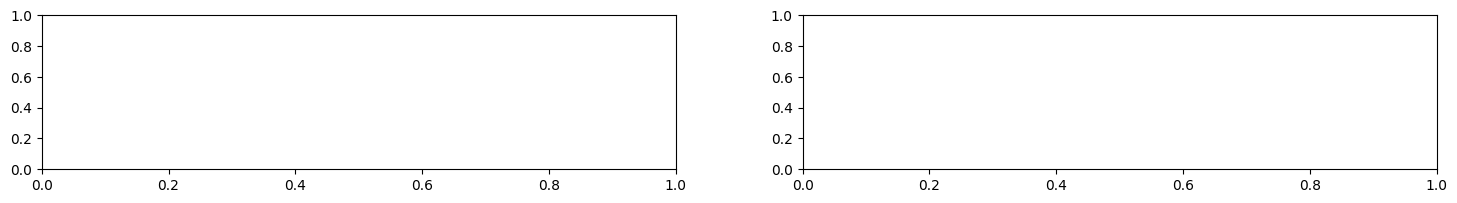

In [27]:
%matplotlib inline
fig, axs = plt.subplots(1, 2, figsize=(18, 2))
x = building_data.index
y1 = building_data['Equipment Electric Power [kWh]']
y2 = building_data['Solar Generation [W/kW]']
axs[0].plot(x, y1)
axs[0].set_xlabel('Time step')
axs[0].set_ylabel('Equipment Electric Power\n[kWh]')
axs[1].plot(x, y2)
axs[1].set_xlabel('Time step')
axs[1].set_ylabel('Solar Generation\n[W/kW]')
fig.suptitle(building_name)
plt.show()

In [15]:
filename = schema['buildings'][building_name]['weather']
filepath = os.path.join(root_directory, filename)
weather_data = pd.read_csv(filepath)
display(weather_data.head())

Outdoor Drybulb Temperature [C]  Relative Humidity [%]  \
0                             20.0                   84.0   
1                             20.1                   79.0   
2                             19.7                   78.0   
3                             19.3                   78.0   
4                             18.9                   78.0   

   Diffuse Solar Radiation [W/m2]  Direct Solar Radiation [W/m2]  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   
3                             0.0                            0.0   
4                             0.0                            0.0   

   6h Prediction Outdoor Drybulb Temperature [C]  \
0                                           18.3   
1                                           19.4   
2                                           21.1   
3                                           22.2   
4                                           21.7   

   12h Prediction Outdoor Drybulb Temperature [C]  \
0                                            22.8   
1                                            22.8   
2                                            22.2   
3                                            22.8   
4                                            22.2   

   24h Prediction Outdoor Drybulb Temperature [C]  \
0                                            20.0   
1                                            19.4   
2                                            19.4   
3                                            19.4   
4                                            18.9   

   6h Prediction Relative Humidity [%]  12h Prediction Relative Humidity [%]  \
0                                 81.0                                  68.0   
1                                 79.0                                  71.0   
2                                 73.0                                  73.0   
3                                 71.0                                  71.0   
4                                 73.0                                  71.0   

   24h Prediction Relative Humidity [%]  \
0                                  81.0   
1                                  87.0   
2                                  87.0   
3                                  90.0   
4                                  90.0   

   6h Prediction Diffuse Solar Radiation [W/m2]  \
0                                          25.0   
1                                         201.0   
2                                         420.0   
3                                         554.0   
4                                         778.0   

   12h Prediction Diffuse Solar Radiation [W/m2]  \
0                                          964.0   
1                                          966.0   
2                                          683.0   
3                                          522.0   
4                                          444.0   

   24h Prediction Diffuse Solar Radiation [W/m2]  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   6h Prediction Direct Solar Radiation [W/m2]  \
0                                        100.0   
1                                        444.0   
2                                        592.0   
3                                        491.0   
4                                        734.0   

   12h Prediction Direct Solar Radiation [W/m2]  \
0                                         815.0   
1                                         747.0   
2                                         291.0   
3                                         153.0   
4                                         174.0

In [19]:
display(weather_data.describe(include='all'))

Outdoor Drybulb Temperature [C]  Relative Humidity [%]  \
count                      8760.000000            8760.000000   
mean                         16.837454              73.004224   
std                           3.564816              16.480251   
min                           5.600000              10.000000   
25%                          14.400000              65.000000   
50%                          17.200000              76.000000   
75%                          19.400000              84.000000   
max                          32.200000             100.000000   

       Diffuse Solar Radiation [W/m2]  Direct Solar Radiation [W/m2]  \
count                     8760.000000                    8760.000000   
mean                       208.282192                     201.231507   
std                        292.799407                     296.193301   
min                          0.000000                       0.000000   
25%                          0.000000                       0.000000   
50%                         10.000000                       0.000000   
75%                        382.000000                     424.000000   
max                       1017.000000                     953.000000   

       6h Prediction Outdoor Drybulb Temperature [C]  \
count                                    8760.000000   
mean                                       16.837454   
std                                         3.564816   
min                                         5.600000   
25%                                        14.400000   
50%                                        17.200000   
75%                                        19.400000   
max                                        32.200000   

       12h Prediction Outdoor Drybulb Temperature [C]  \
count                                     8760.000000   
mean                                        16.837454   
std                                          3.564816   
min                                          5.600000   
25%                                         14.400000   
50%                                         17.200000   
75%                                         19.400000   
max                                         32.200000   

       24h Prediction Outdoor Drybulb Temperature [C]  \
count                                     8760.000000   
mean                                        16.837454   
std                                          3.564816   
min                                          5.600000   
25%                                         14.400000   
50%                                         17.200000   
75%                                         19.400000   
max                                         32.200000   

       6h Prediction Relative Humidity [%]  \
count                          8760.000000   
mean                             73.004224   
std                              16.480251   
min                              10.000000   
25%                              65.000000   
50%                              76.000000   
75%                              84.000000   
max                             100.000000   

       12h Prediction Relative Humidity [%]  \
count                           8760.000000   
mean                              73.004224   
std                               16.480251   
min                               10.000000   
25%                               65.000000   
50%                               76.000000   
75%                               84.000000   
max                              100.000000   

       24h Prediction Relative Humidity [%]  \
count                           8760.000000   
mean                              73.004224   
std                               16.480251   
min                               10.000000   
25%                               65.000000   
50%                               76.000000   
75%                               84.000000   
max                     

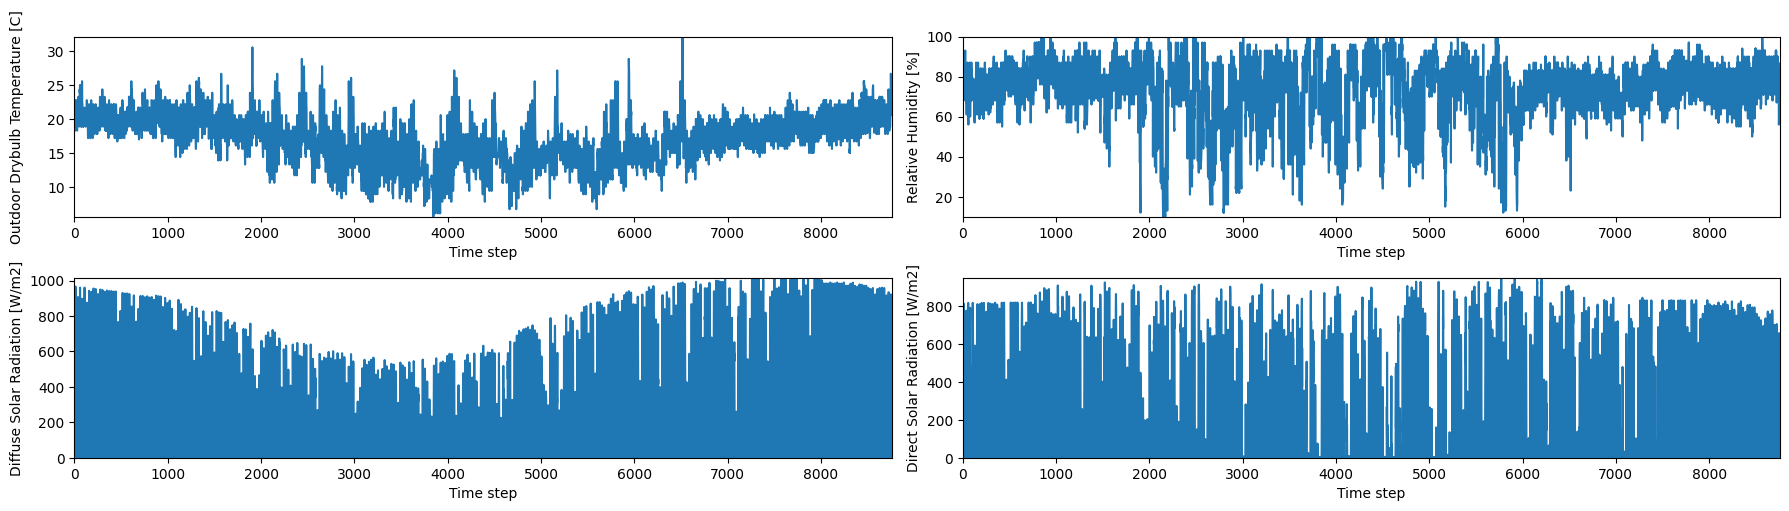

In [20]:
columns = [
    'Outdoor Drybulb Temperature [C]', 'Relative Humidity [%]',
    'Diffuse Solar Radiation [W/m2]', 'Direct Solar Radiation [W/m2]'
]
fig, axs = plt.subplots(2, 2, figsize=(18, 5))
x = weather_data.index

for ax, c in zip(fig.axes, columns):
    y = weather_data[c]
    ax.plot(x, y)
    ax.set_xlabel('Time step')
    ax.set_ylabel(c)

fig.align_ylabels()
plt.tight_layout()
plt.show()

In [22]:
filename = schema['buildings'][building_name]['pricing']
filepath = os.path.join(root_directory, filename)
pricing_data = pd.read_csv(filepath)
display(pricing_data.tail())

Electricity Pricing [$/kWh]  6h Prediction Electricity Pricing [$/kWh]  \
8755                         0.54                                       0.22   
8756                         0.54                                       0.22   
8757                         0.22                                       0.22   
8758                         0.22                                       0.22   
8759                         0.22                                       0.22   

      12h Prediction Electricity Pricing [$/kWh]  \
8755                                        0.22   
8756                                        0.22   
8757                                        0.22   
8758                                        0.22   
8759                                        0.22   

      24h Prediction Electricity Pricing [$/kWh]  
8755                                        0.54  
8756                                        0.54  
8757                                        0.22  
8758                                        0.22  
8759                                        0.22

In [25]:
filename = schema['buildings'][building_name]['carbon_intensity']
filepath = os.path.join(root_directory, filename)
carbon_intensity_data = pd.read_csv(filepath)
display(carbon_intensity_data.head())
display(carbon_intensity_data.describe(include='all').T)

kg_CO2/kWh
0    0.170724
1    0.157319
2    0.154503
3    0.150945
4    0.151820

count      mean      std       min      25%       50%       75%  \
kg_CO2/kWh  8760.0  0.156531  0.03537  0.070383  0.13108  0.154263  0.178429   

                 max  
kg_CO2/kWh  0.281796

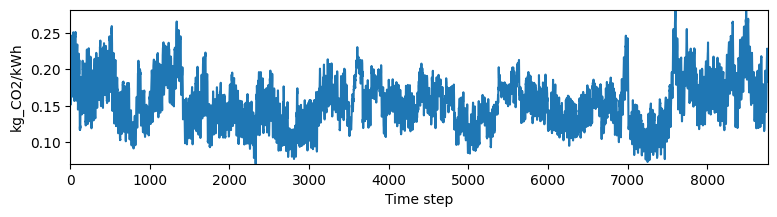

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(9, 2))
x = carbon_intensity_data.index
y = carbon_intensity_data['kg_CO2/kWh']
ax.plot(x, y)
ax.set_xlabel('Time step')
ax.set_ylabel('kg_CO2/kWh')
plt.show()

In [27]:
def set_schema_buildings(
schema: dict, count: int, seed: int
) -> Tuple[dict, List[str]]:
    """Randomly select number of buildings to set as active in the schema.

    Parameters
    ----------
    schema: dict
        CityLearn dataset mapping used to construct environment.
    count: int
        Number of buildings to set as active in schema.
    seed: int
        Seed for pseudo-random number generator

    Returns
    -------
    schema: dict
        CityLearn dataset mapping with active buildings set.
    buildings: List[str]
        List of selected buildings.
    """

    assert 1 <= count <= 15, 'count must be between 1 and 15.'

    # set random seed
    np.random.seed(seed)

    # get all building names
    buildings = list(schema['buildings'].keys())

    # remove buildins 12 and 15 as they have pecularities in their data
    # that are not relevant to this tutorial
    buildings_to_exclude = ['Building_12', 'Building_15']

    for b in buildings_to_exclude:
        buildings.remove(b)

    # randomly select specified number of buildings
    buildings = np.random.choice(buildings, size=count, replace=False).tolist()

    # reorder buildings
    building_ids = [int(b.split('_')[-1]) for b in buildings]
    building_ids = sorted(building_ids)
    buildings = [f'Building_{i}' for i in building_ids]

    # update schema to only included selected buildings
    for b in schema['buildings']:
        if b in buildings:
            schema['buildings'][b]['include'] = True
        else:
            schema['buildings'][b]['include'] = False

    return schema, buildings

In [28]:
def set_schema_simulation_period(
    schema: dict, count: int, seed: int
) -> Tuple[dict, int, int]:
    """Randomly select environment simulation start and end time steps
    that cover a specified number of days.

    Parameters
    ----------
    schema: dict
        CityLearn dataset mapping used to construct environment.
    count: int
        Number of simulation days.
    seed: int
        Seed for pseudo-random number generator.

    Returns
    -------
    schema: dict
        CityLearn dataset mapping with `simulation_start_time_step`
        and `simulation_end_time_step` key-values set.
    simulation_start_time_step: int
        The first time step in schema time series files to
        be read when constructing the environment.
    simulation_end_time_step: int
        The last time step in schema time series files to
        be read when constructing the environment.
    """

    assert 1 <= count <= 365, 'count must be between 1 and 365.'

    # set random seed
    np.random.seed(seed)

    # use any of the files to determine the total
    # number of available time steps
    filename = schema['buildings'][building_name]['carbon_intensity']
    filepath = os.path.join(root_directory, filename)
    time_steps = pd.read_csv(filepath).shape[0]

    # set candidate simulation start time steps
    # spaced by the number of specified days
    simulation_start_time_step_list = np.arange(0, time_steps, 24*count)

    # randomly select a simulation start time step
    simulation_start_time_step = np.random.choice(
        simulation_start_time_step_list, size=1
    )[0]
    simulation_end_time_step = simulation_start_time_step + 24*count - 1

    # update schema simulation time steps
    schema['simulation_start_time_step'] = simulation_start_time_step
    schema['simulation_end_time_step'] = simulation_end_time_step

    return schema, simulation_start_time_step, simulation_end_time_step

In [29]:
def set_active_observations(
    schema: dict, active_observations: List[str]
) -> dict:
    """Set the observations that will be part of the environment's
    observation space that is provided to the control agent.

    Parameters
    ----------
    schema: dict
        CityLearn dataset mapping used to construct environment.
    active_observations: List[str]
        Names of observations to set active to be passed to control agent.

    Returns
    -------
    schema: dict
        CityLearn dataset mapping with active observations set.
    """

    active_count = 0

    for o in schema['observations']:
        if o in active_observations:
            schema['observations'][o]['active'] = True
            active_count += 1
        else:
            schema['observations'][o]['active'] = False

    valid_observations = list(schema['observations'].keys())
    assert active_count == len(active_observations),\
        'the provided observations are not all valid observations.'\
          f' Valid observations in CityLearn are: {valid_observations}'

    return schema

In [30]:
RANDOM_SEED = 0
print('Random seed:', RANDOM_SEED)

Random seed: 0


In [31]:
# edit next code line to change number of buildings in simulation
BUILDING_COUNT = 2

 # edit next code line to change number of days in simulation
DAY_COUNT = 7

# edit next code line to change active observations in simulation
ACTIVE_OBSERVATIONS = ['hour']

schema, buildings = set_schema_buildings(schema, BUILDING_COUNT, RANDOM_SEED)
schema, simulation_start_time_step, simulation_end_time_step =\
    set_schema_simulation_period(schema, DAY_COUNT, RANDOM_SEED)
schema = set_active_observations(schema, ACTIVE_OBSERVATIONS)

print('Selected buildings:', buildings)
print(
    f'Selected {DAY_COUNT}-day period time steps:',
    (simulation_start_time_step, simulation_end_time_step)
)
print(f'Active observations:', ACTIVE_OBSERVATIONS)

Selected buildings: ['Building_2', 'Building_7']
Selected 7-day period time steps: (7392, 7559)
Active observations: ['hour']


In [32]:
schema['central_agent'] = True

In [33]:
env = CityLearnEnv(schema)

In [34]:
print('Current time step:', env.time_step)
print('environment number of time steps:', env.time_steps)
print('environment uses central agent:', env.central_agent)
print('Common (shared) observations amogst buildings:', env.shared_observations)
print('Number of buildings:', len(env.buildings))

Current time step: 0
environment number of time steps: 168
environment uses central agent: True
Common (shared) observations amogst buildings: ['month', 'day_type', 'hour', 'daylight_savings_status', 'outdoor_dry_bulb_temperature', 'outdoor_dry_bulb_temperature_predicted_6h', 'outdoor_dry_bulb_temperature_predicted_12h', 'outdoor_dry_bulb_temperature_predicted_24h', 'outdoor_relative_humidity', 'outdoor_relative_humidity_predicted_6h', 'outdoor_relative_humidity_predicted_12h', 'outdoor_relative_humidity_predicted_24h', 'diffuse_solar_irradiance', 'diffuse_solar_irradiance_predicted_6h', 'diffuse_solar_irradiance_predicted_12h', 'diffuse_solar_irradiance_predicted_24h', 'direct_solar_irradiance', 'direct_solar_irradiance_predicted_6h', 'direct_solar_irradiance_predicted_12h', 'direct_solar_irradiance_predicted_24h', 'carbon_intensity']
Number of buildings: 2


In [35]:
# electrical storage
print('Electrical storage capacity:', {
    b.name: b.electrical_storage.capacity for b in env.buildings
})
print('Electrical storage nominal power:', {
    b.name: b.electrical_storage.nominal_power for b in env.buildings
})
print('Electrical storage capacity history:', {
    b.name: b.electrical_storage.capacity_history for b in env.buildings
})
print('Electrical storage loss_coefficient:', {
    b.name: b.electrical_storage.loss_coefficient for b in env.buildings
})
print('Electrical storage initial_soc:', {
    b.name: b.electrical_storage.initial_soc for b in env.buildings
})
print('Electrical storage soc:', {
    b.name: b.electrical_storage.soc for b in env.buildings
})
print('Electrical storage efficiency:', {
    b.name: b.electrical_storage.efficiency for b in env.buildings
})
print('Electrical storage efficiency history:', {
    b.name: b.electrical_storage.efficiency_history for b in env.buildings
})
print('Electrical storage electricity consumption:', {
    b.name: b.electrical_storage.electricity_consumption
    for b in env.buildings
})
print('Electrical storage capacity loss coefficient:', {
    b.name: b.electrical_storage.loss_coefficient for b in env.buildings
})
print()
# pv
print('PV nominal power:', {
    b.name: b.pv.nominal_power for b in env.buildings
})
print()

# active observations and actions
with pd.option_context(
    'display.max_rows', None,
    'display.max_columns', None,
    'display.width', None
):
    print('Active observations:')
    display(pd.DataFrame([
        {**{'building':b.name}, **b.observation_metadata}
        for b in env.buildings
    ]))
    print()
    print('Active actions:')
    display(pd.DataFrame([
        {**{'building':b.name}, **b.action_metadata}
        for b in env.buildings
    ]))

Electrical storage capacity: {'Building_2': 6.4, 'Building_7': 6.4}
Electrical storage nominal power: {'Building_2': 5.0, 'Building_7': 5.0}
Electrical storage capacity history: {'Building_2': [6.4], 'Building_7': [6.4]}
Electrical storage loss_coefficient: {'Building_2': 0.0, 'Building_7': 0.0}
Electrical storage initial_soc: {'Building_2': 0.0, 'Building_7': 0.0}
Electrical storage soc: {'Building_2': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

building  month  day_type  hour  daylight_savings_status  \
0  Building_2  False     False  True                    False   
1  Building_7  False     False  True                    False   

   outdoor_dry_bulb_temperature  outdoor_dry_bulb_temperature_predicted_6h  \
0                         False                                      False   
1                         False                                      False   

   outdoor_dry_bulb_temperature_predicted_12h  \
0                                       False   
1                                       False   

   outdoor_dry_bulb_temperature_predicted_24h  outdoor_relative_humidity  \
0                                       False                      False   
1                                       False                      False   

   outdoor_relative_humidity_predicted_6h  \
0                                   False   
1                                   False   

   outdoor_relative_humidity_predicted_12h  \
0                                    False   
1                                    False   

   outdoor_relative_humidity_predicted_24h  diffuse_solar_irradiance  \
0                                    False                     False   
1                                    False                     False   

   diffuse_solar_irradiance_predicted_6h  \
0                                  False   
1                                  False   

   diffuse_solar_irradiance_predicted_12h  \
0                                   False   
1                                   False   

   diffuse_solar_irradiance_predicted_24h  direct_solar_irradiance  \
0                                   False                    False   
1                                   False                    False   

   direct_solar_irradiance_predicted_6h  \
0                                 False   
1                                 False   

   direct_solar_irradiance_predicted_12h  \
0                                  False   
1                                  False   

   direct_solar_irradiance_predicted_24h  carbon_intensity  \
0                                  False             False   
1                                  False             False   

   indoor_dry_bulb_temperature  average_unmet_cooling_setpoint_difference  \
0                        False                                      False   
1                        False                                      False   

   indoor_relative_humidity  non_shiftable_load  solar_generation  \
0                     False               False             False   
1                     False               False             False   

   cooling_storage_soc  heating_storage_soc  dhw_storage_soc  \
0                False                False            False   
1                False                False            False   

   electrical_storage_soc  net_electricity_consumption  electricity_pricing  \
0                   False                        False                False   
1                   False                        False                False   

   electricity_pricing_predicted_6h  electricity_pricing_predicted_12h  \
0                             False                              False   
1                             False                              False   

   electricity_pricing_predicted_24h  power_outage  
0                              False         False  
1                              False         False


Active actions:


building  cooling_storage  heating_storage  dhw_storage  \
0  Building_2            False            False        False   
1  Building_7            False            False        False   

   electrical_storage  
0                True  
1                True